<a href="https://colab.research.google.com/github/vbaezfortunato/Statistical-Learning-I-Seccion-V/blob/master/Foward_propagation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Foward Propagation**

* Utilizando Numpy definir una función para calcular la salida de los siguientes modelos

* Dado que cada sub-modelo “detecta” una característica intermedia h(variable latente)
determinar para cada entrada la característica intermedia con mayor presencia.


In [5]:
import numpy as np

In [25]:
# Definir función sigmoid a utilizar como activación para las neuronas
def sigmoid(X):
  return 1/(1+np.exp(-X))

In [27]:
def relu(X):
   return np.maximum(0,X)

In [28]:
def softmax(X):
    expo = np.exp(X)
    expo_sum = np.sum(np.exp(X))
    return expo/expo_sum


***Primera Red:***


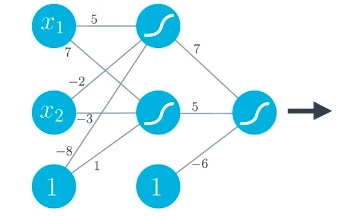

In [75]:
def foward_propagation(X,W_1,W_2):  
        #matriz de pesos
   X = np.append(X, 1)
   capa_intermedia_1 = sigmoid(np.matmul(X,W_1))
   X_1 = np.append(capa_intermedia_1, 1)
            #multiplilcacion matricial 
   capa_final = sigmoid(np.matmul(X_1,W_2))
    
    
    #print(features_2)
   return capa_intermedia_1, capa_final



**Cargar los  Weights de la Primera Red**

In [78]:
W_1 = np.array([[5,7],[-2,-3],[-8,1]])
W_2 = np.array([7,5,-6])
X = np.array([1,1])


In [82]:
intermedia, final = foward_propagation(X,W_1,W_2)

In [60]:
print("Intermedia -->",intermedia)

Intermedia --> [0.00669285 0.99330715]


In [61]:
print("Final -->",final)

Final --> 0.2715813356119339


**Segunda Red:**

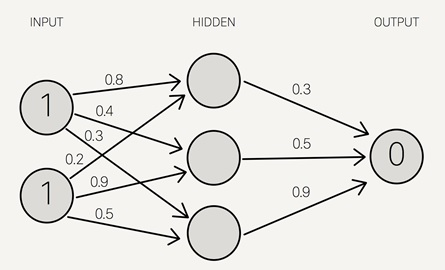

In [83]:
def foward_propagation(X,W_1,W_2):  
        #matriz de pesos
   capa_intermedia_1 = sigmoid(np.matmul(X,W_1))
   X_1 = capa_intermedia_1
            #multiplilcacion matricial 
   capa_final = sigmoid(np.matmul(X_1,W_2))
    
    
    #print(features_2)
   return capa_intermedia_1, capa_final

In [62]:
w_1 = np.array([[0.8, 0.4, 0.3],[0.2, 0.9, 0.5]])
w_2 = np.array([0.3, 0.5, 0.9])
X = np.array([1,1])

In [84]:
intermedia, final = foward_propagation(X,w_1,w_2)

In [85]:
print("Intermedia -->",intermedia)

Intermedia --> [0.73105858 0.78583498 0.68997448]


In [86]:
print("Final -->",final)

Final --> 0.7743802720529458


# **Parte 2:**

* Calcular para cada posible punto en el dominio de xor la salida intermedia H = [h1, h2].
* Mostrar la matriz resultante H en el notebook.
* Graficar cada punto de la representación intermedia (scatter), usar diferente color y o marker según su etiqueta. Puesto que tiene 2 posibles valores, la gráfica debe tener 2 colores o markers.

* Analizar el resultado intermedio, concluir y comentar opiniones

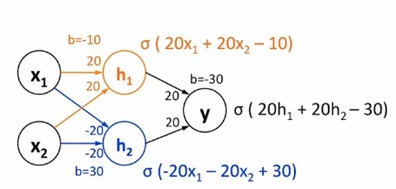

In [2]:
# Heaviside step function
def check_x (x):
    return (x >= 0).astype(np.float)



In [110]:
def forwardPropXOR(x, activation=check_x, retHidden=False):
   
    W_1 = np.array([[20., 20., -10.], [-20., -20., 30.]])
    W_2 = np.array([[20, 20, -30]])
    
    z_1 = np.matmul(W_1, np.vstack((x, np.ones(x.shape[1]))))
    h_1 = activation(z_1)
    # Capa de salida
    z_2 = np.matmul(W_2, np.vstack((h_1, np.ones(h_1.shape[1]))))
    y = activation(z_2)
    
    if retHidden:
        return y, h_1
    return y

In [107]:
x = np.array([[0,0], [0,1], [1,0], [1,1]])
x = x.T
x, x.shape

(array([[0, 0, 1, 1],
        [0, 1, 0, 1]]), (2, 4))

In [108]:
np.vstack((x, np.ones(x.shape[1])))

array([[0., 0., 1., 1.],
       [0., 1., 0., 1.],
       [1., 1., 1., 1.]])

In [109]:
forwardPropXOR(x)

array([[0., 1., 1., 0.]])

In [41]:
y_s = forwardPropXOR(x,activation=sigmoid)

In [42]:
y_r = forwardPropXOR(x,activation=relu)

In [43]:
y_so = forwardPropXOR(x,activation=softmax)

In [104]:
 _,h =  forwardPropXOR(x,  retHidden=True)

In [113]:
h[0,:]

array([0., 1., 1., 1.])

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [129]:
def graficar(x1, x2, y):
    f = np.abs(y-1) < 0.1
    nf = np.logical_not(f)

    plt.scatter(x1[f], x2[f], marker='*', label='1')
    plt.scatter(x1[nf], x2[nf], marker='o', label='0')
    plt.legend()

In [116]:
 np.round(y_s).reshape(1,-1)

array([[0., 1., 1., 0.]])

In [121]:
h[0,:]

array([0., 1., 1., 1.])

In [122]:
h[1,:]

array([1., 1., 1., 0.])

In [123]:
x1 = x[0, :]
x1

array([0, 0, 1, 1])

In [126]:
x2 = x[1, :]
x2

array([0, 1, 0, 1])

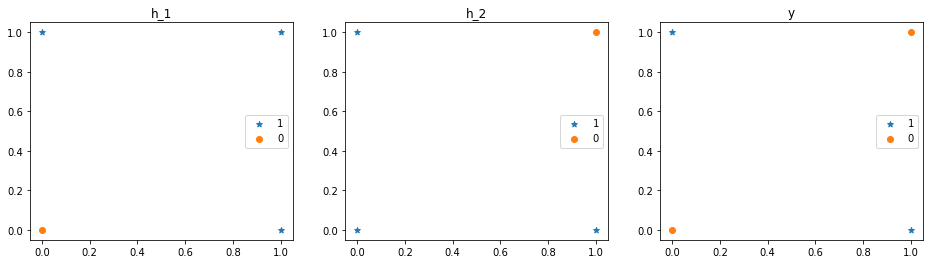

In [132]:
x1 = x[0, :]
x2 = x[1, :]

plt.figure(figsize=(16, 4))
plt.subplot(1,3,1)
graficar(x1, x2, h[0, :])
plt.title("h_1")
plt.subplot(1,3,2)
graficar(x1, x2, h[1, :])
plt.title("h_2")
plt.subplot(1,3,3)
graficar(x1, x2, forwardPropXOR(x,activation=sigmoid).squeeze())
plt.title("y");


# **Conclusion:** 

* Como podemos obversar las capas intermedias muestra un comportamiento AND del modelo *XOR* es decir que la activacion ocurre en caso particulares.
* Las capas de salidas muestra el OR comportamiento permitiedo que las salidas de las capas intermedias.
